In [858]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel, linear_kernel
import difflib
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import ast
from ast import literal_eval
import json

In [859]:
df = pd.read_csv('E:\PROJECT\AI-drivenMovie recommendation systems\clean_data.csv')

In [860]:
df.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [861]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [862]:
df.shape

(4803, 19)

# Content-based model 

In [863]:
vectorizer = TfidfVectorizer()

In [864]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [865]:
df['overview']=df['overview'].fillna('')

In [866]:
df['overview'].isnull().sum()

0

In [867]:
tfv = TfidfVectorizer(min_df=3,max_features=None,ngram_range=(1,3),stop_words='english')

In [868]:
tfv_matrix = tfv.fit_transform(df['overview'])

In [869]:
tfv_matrix.shape

(4803, 9919)

In [870]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [871]:
tfv_matrix[0].T.toarray()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [872]:
df2 = pd.DataFrame(tfv_matrix)
df2.head(2)


,0
0,"(0, 140)\t0.3091311403250014\n (0, 1612)\t0..."
1,"(0, 1751)\t0.36793229072333994\n (0, 6978)\..."


In [873]:
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [874]:
data = pd.Series(df.index,index = df['original_title'])
data

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [875]:
len(list(sig[data['Avatar']]))

4803

In [876]:
sigma_score = sorted(list(enumerate(list(sig[data['Avatar']]))),key=lambda x: x[1],reverse=True)
print(sigma_score)

[(0, 0.7616364930962501), (1341, 0.7616030155858681), (634, 0.7616028561141562), (3604, 0.761601930611584), (2130, 0.7616015339622925), (775, 0.7616011086528327), (529, 0.7615996114069044), (151, 0.7615991171152051), (311, 0.7615990624497703), (847, 0.7615987706430225), (570, 0.7615986450599548), (942, 0.7615984376900236), (36, 0.761597988130195), (1610, 0.7615979793934843), (3070, 0.7615978406764746), (1033, 0.7615978182403835), (2628, 0.7615977834088159), (1784, 0.7615977150705628), (2578, 0.7615976778191441), (150, 0.7615976453752453), (3724, 0.7615975951237102), (1013, 0.761597590729192), (4211, 0.7615975631290406), (1213, 0.7615975380289366), (1345, 0.7615974549075267), (312, 0.7615974086679764), (4039, 0.7615973645677722), (2967, 0.7615973512232982), (614, 0.7615972949789032), (281, 0.7615972537743877), (174, 0.7615972462403858), (3493, 0.7615971922075142), (3624, 0.7615971821325882), (972, 0.7615971791001622), (1274, 0.7615971587672579), (1959, 0.76159713681488), (3970, 0.761597

In [877]:
sigma_score[1:11]

[(1341, 0.7616030155858681),
 (634, 0.7616028561141562),
 (3604, 0.761601930611584),
 (2130, 0.7616015339622925),
 (775, 0.7616011086528327),
 (529, 0.7615996114069044),
 (151, 0.7615991171152051),
 (311, 0.7615990624497703),
 (847, 0.7615987706430225),
 (570, 0.7615986450599548)]

In [878]:
ind = [index[0] for index in sigma_score[1:11]]

In [879]:
df['original_title'].iloc[ind]

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
570                           Ransom
Name: original_title, dtype: object

In [880]:
def give_recommendation(title,model):
    title_name = data[title]
    model_score = list(enumerate(list(model[data[title_name]])))
    model_score = sorted(model_score,key=lambda x: x[1],reverse=True)
    model_score = model_score[1:11]
    ind =[index[0] for index in model_score]
    return df['original_title'].iloc[ind]

In [881]:
give_recommendation('Avatar',sig)

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
570                           Ransom
Name: original_title, dtype: object

In [882]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [883]:
features = ['cast','crew','keywords','genres']

In [884]:
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
 


In [885]:
df[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [886]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name'].strip()
    else:
        return np.nan



In [887]:
get_director(df['crew'][0])

'James Cameron'

In [888]:
df['director'] = df['crew'].apply(get_director)

In [889]:
df['director'].isnull().sum()

30

In [890]:
df1 = df.copy()
df1.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,director
0,0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski


In [891]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'].strip().lower() for i in x]
        if len(names) > 3:
            return names[0:3]
        else:
            return names
    


In [892]:
get_list(df['crew'][0])

['stephen e. rivkin', 'rick carter', 'christopher boyes']

In [893]:
for feature in features:
    df[feature]= df[feature].apply(get_list)

In [894]:
df[features]

,cast,crew,keywords,genres
0,"[sam worthington, zoe saldana, sigourney weaver]","[stephen e. rivkin, rick carter, christopher b...","[culture clash, future, space war]","[action, adventure, fantasy]"
1,"[johnny depp, orlando bloom, keira knightley]","[dariusz wolski, gore verbinski, jerry bruckhe...","[ocean, drug abuse, exotic island]","[adventure, fantasy, action]"
2,"[daniel craig, christoph waltz, léa seydoux]","[thomas newman, sam mendes, anna pinnock]","[spy, based on novel, secret agent]","[action, adventure, crime]"
3,"[christian bale, michael caine, gary oldman]","[hans zimmer, charles roven, christopher nolan]","[dc comics, crime fighter, terrorist]","[action, crime, drama]"
4,"[taylor kitsch, lynn collins, samantha morton]","[andrew stanton, andrew stanton, john lasseter]","[based on novel, mars, medallion]","[action, adventure, science fiction]"
...,...,...,...,...
4798,"[carlos gallardo, jaime de hoyos, peter marqua...","[robert rodriguez, robert rodriguez, robert ro...","[united states–mexico barrier, legs, arms]","[action, crime, thriller]"
4799,"[edward burns, kerry bishé, marsha dietlein]","[edward burns, edward burns, edward burns]",[],"[comedy, romance]"
4800,"[eric mabius, kristin booth, crystal lowe]","[carla hetland, harvey kahn, adam sliwinski]","[date, love at first sight, narration]","[comedy, drama, romance]"
4801,"[daniel henney, eliza coupe, bill paxton]","[daniel hsia, daniel hsia]",[],[]


In [895]:
df1[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [896]:
df.isnull().sum()

Unnamed: 0                0
budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
director                 30
dtype: int64

In [897]:
df.dropna(subset=['director'],inplace=True)

In [898]:
df.isnull().sum()

Unnamed: 0                0
budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
release_date              0
revenue                   0
runtime                   2
spoken_languages          0
tagline                 822
vote_average              0
vote_count                0
cast                      0
crew                      0
director                  0
dtype: int64

In [899]:
df['cast'][0]

['sam worthington', 'zoe saldana', 'sigourney weaver']

In [900]:
def create_feature(row):
    return ' '.join(row['keywords']) + ' ' + ' '.join(row['cast']) + ' '+ ' '.join(row['crew'])+ ' ' + row['director']+ ' ' + ' '.join(row['genres']) 

In [901]:
df['important_feature'] = df.apply(create_feature,axis=1)

In [902]:
df.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,director,important_feature
0,0,237000000,"[action, adventure, fantasy]",19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[sam worthington, zoe saldana, sigourney weaver]","[stephen e. rivkin, rick carter, christopher b...",James Cameron,culture clash future space war sam worthington...
1,1,300000000,"[adventure, fantasy, action]",285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[johnny depp, orlando bloom, keira knightley]","[dariusz wolski, gore verbinski, jerry bruckhe...",Gore Verbinski,ocean drug abuse exotic island johnny depp orl...


In [903]:
count = CountVectorizer(stop_words='english')

In [904]:
count_matrix = count.fit_transform(df['important_feature'])

In [905]:
co_sim =cosine_similarity(count_matrix,count_matrix)

In [906]:
co_sim[0]

array([1.       , 0.1254363, 0.1672484, ..., 0.       , 0.       ,
       0.       ])

In [907]:
give_recommendation('The Godfather',co_sim)

2731     The Godfather: Part II
867     The Godfather: Part III
3401                      Twixt
1209              The Rainmaker
4209           The Conversation
1018            The Cotton Club
2600           New York Stories
1167                    Dracula
3012              The Outsiders
3738        Lost in Translation
Name: original_title, dtype: object

In [908]:
give_recommendation('The Godfather',sig)

2731                             The Godfather: Part II
1873                                         Blood Ties
3730                                              Cargo
867                             The Godfather: Part III
3623                                               Made
3963                                 They Came Together
2464                             The Master of Disguise
2973    For Greater Glory - The True Story of Cristiada
2389                                        Renaissance
1475                                  Playing for Keeps
Name: original_title, dtype: object

# Average_weighted_Technique

In [909]:
df.shape

(4773, 21)

In [910]:
v = df['vote_count']
c = df['vote_average'].mean()
R = df['vote_average']
c

6.10917661847894

<AxesSubplot:>

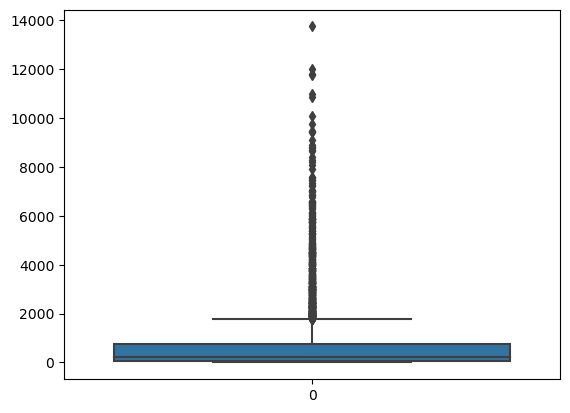

In [911]:
plt.figure()
sns.boxplot(df['vote_count'])

In [912]:
df = df[df['vote_count']>=1861]
threshold_value = df['vote_count'].quantile(0.9)
m=threshold_value

In [913]:
def weighted_avg_rating(x,m=m,c=c):
    v=x['vote_count']
    R =x['vote_average']
    return ((R*v)+(c+m))/(v+m)


In [914]:
df['weighted_avg'] = df.apply(weighted_avg_rating,axis=1)
df['weighted_avg']

0       5.062549
1       3.479585
2       3.217697
3       4.924399
4       2.300533
          ...   
4291    2.613899
4300    3.612836
4302    2.926347
4337    3.029881
4602    2.805971
Name: weighted_avg, Length: 478, dtype: float64

In [915]:
sorted_df = df.sort_values('weighted_avg',ascending=False)
sorted_df.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,director,important_feature,weighted_avg
96,96,160000000,"[action, thriller, science fiction]",27205,"[loss of lover, dream, kidnapping]",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Your mind is the scene of the crime.,8.1,13752,"[leonardo dicaprio, joseph gordon-levitt, elle...","[hans zimmer, christopher nolan, christopher n...",Christopher Nolan,loss of lover dream kidnapping leonardo dicapr...,5.891584
65,65,185000000,"[drama, action, crime]",155,"[dc comics, crime fighter, secret identity]",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[christian bale, heath ledger, aaron eckhart]","[lucinda syson, hans zimmer, charles roven]",Christopher Nolan,dc comics crime fighter secret identity christ...,5.745277


In [916]:
sorted_df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'important_feature', 'weighted_avg'],
      dtype='object')

In [917]:
sorted_df[['original_title','vote_average', 'vote_count','weighted_avg','popularity']].head(15)

,original_title,vote_average,vote_count,weighted_avg,popularity
96,Inception,8.1,13752,5.891584,167.583710
65,The Dark Knight,8.2,12002,5.745277,187.322927
95,Interstellar,8.1,10867,5.518490,724.247784
662,Fight Club,8.3,9413,5.398736,146.757391
1881,The Shawshank Redemption,8.5,8205,5.269444,136.747729
94,Guardians of the Galaxy,7.9,9742,5.214289,481.098624
287,Django Unchained,7.8,10099,5.211155,82.121691
3232,Pulp Fiction,8.3,8428,5.203507,121.463076
16,The Avengers,7.4,11776,5.190644,144.448633
788,Deadpool,7.4,10995,5.090353,514.569956


Text(0, 0.5, 'movie title')

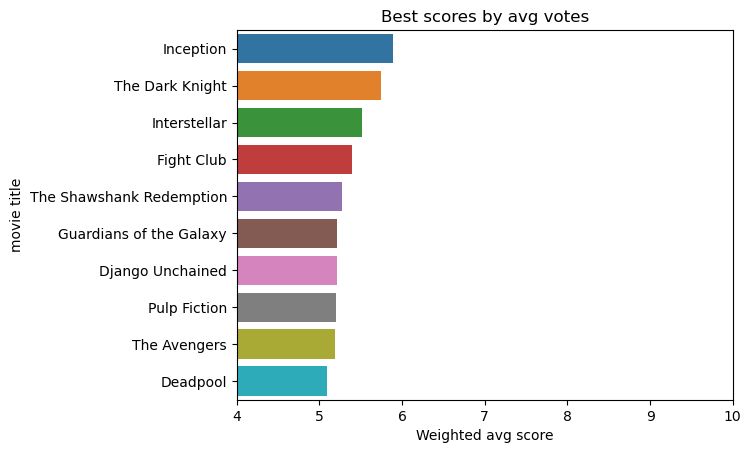

In [918]:
sns.barplot(x= sorted_df['weighted_avg'].head(10),y=sorted_df['original_title'].head(10))
plt.xlim(4,10)
plt.title('Best scores by avg votes')
plt.xlabel('Weighted avg score')
plt.ylabel('movie title')


# Popularity based recommendation model

In [919]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'important_feature', 'weighted_avg'],
      dtype='object')

In [920]:
popularity = df.sort_values('popularity',ascending=False)

In [921]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'important_feature', 'weighted_avg'],
      dtype='object')

In [922]:
pop = popularity[['original_title','popularity','vote_average', 'vote_count']]
pop

,original_title,popularity,vote_average,vote_count
546,Minions,875.581305,6.4,4571
95,Interstellar,724.247784,8.1,10867
788,Deadpool,514.569956,7.4,10995
94,Guardians of the Galaxy,481.098624,7.9,9742
127,Mad Max: Fury Road,434.278564,7.2,9427
...,...,...,...,...
101,X-Men: First Class,3.195174,7.1,5181
203,X2,2.871739,6.8,3506
508,The Lost World: Jurassic Park,2.502487,6.2,2487
2511,Home Alone,2.186927,7.1,2414


Text(0, 0.5, 'scores')

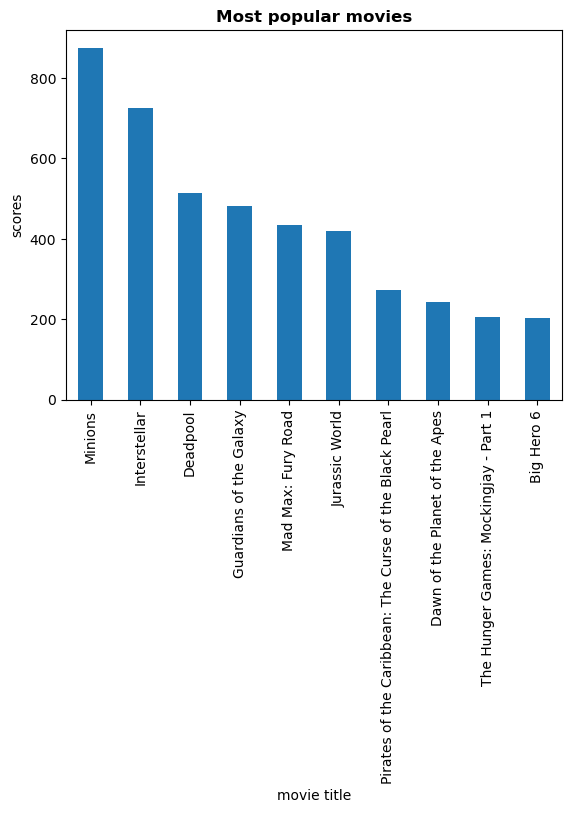

In [923]:
pop.set_index('original_title')['popularity'].nlargest(10).plot(kind='bar')
plt.title("Most popular movies",weight = 'bold')
plt.xlabel('movie title')
plt.ylabel("scores")

# Recommendation system using Hybrid model 

In [924]:
scaling = MinMaxScaler()

In [925]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'important_feature', 'weighted_avg'],
      dtype='object')

In [926]:
df_scale = scaling.fit_transform(popularity[['weighted_avg','popularity']])


In [927]:
popularity[['weighted_rating_scaled','popularity_scaled']]=df_scale

In [928]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'important_feature', 'weighted_avg', 'weighted_rating_scaled',
       'popularity_scaled'],
      dtype='object')

In [929]:
popularity['score_mix'] = popularity['weighted_rating_scaled']*0.5 + popularity['popularity_scaled']*0.5

In [930]:
sort_popularity = popularity.sort_values(['score_mix'],ascending=False)
sort_popularity.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,cast,crew,director,important_feature,weighted_avg,weighted_rating_scaled,popularity_scaled,score_mix
95,95,165000000,"[adventure, drama, science fiction]",157336,"[saving the world, artificial intelligence, fa...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,8.1,10867,"[matthew mcconaughey, jessica chastain, anne h...","[hans zimmer, christopher nolan, christopher n...",Christopher Nolan,saving the world artificial intelligence fathe...,5.518490,0.906219,0.826794,0.866507
788,788,58000000,"[action, adventure, comedy]",293660,"[anti hero, mercenary, marvel comic]",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,7.4,10995,"[ryan reynolds, morena baccarin, ed skrein]","[ronna kress, sala baker, lauren shuler donner]",Tim Miller,anti hero mercenary marvel comic ryan reynolds...,5.090353,0.798603,0.586812,0.692707


In [931]:
px.bar(x=sort_popularity[0:10]['original_title'],y=sort_popularity[0:10]['score_mix'])

This horizontal bar chart that displays the top 10 movies based on their mixed popularity scores.This sets the mixed popularity scores for the top 10 movies as the y-axis values for the bar chart. Score_mix is a column that contains the mixed popularity score for each movie, which was calculated using a weighted average of its popularity based on votes and its weighted rating score.
